In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import cv2
import pickle

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [4]:
path = os.path.join('images','Mbappe') # path of the image
sr = os.listdir(path) # image sr. no. in a list

Original Image of Mbappe
SHAPE : (162, 310, 3)


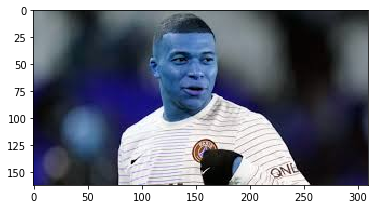

In [5]:
mbappe = cv2.imread(os.path.join(path,sr[10]))

print("Original Image of Mbappe")
print('SHAPE :',mbappe.shape)

plt.imshow(mbappe)
plt.show()

#### making data with labels

In [17]:
DATA = 'images'
CATEGORY = ["Crishtiano Ronaldo","Diego Maradona","Lionel Messi","Mbappe","Ronaldinho"]
data = []
cls = []

def training_data():
    for c in CATEGORY :
        path = os.path.join(DATA,c)
        class_num = CATEGORY.index(c)
        for img in os.listdir('/Users/user/Footballers-CNN/images/Christiano Ronaldo'):
            try:
                img_arr = cv2.imread(os.path.join(path,img))
                new_arr = cv2.resize(img_arr,(64,64))
                data.append(new_arr)
                cls.append(class_num)
                
            except Exception as e:
                pass
            
training_data()

In [18]:
X = np.array(data)
y = np.array(cls)

In [19]:
X.shape

(400, 64, 64, 3)

In [20]:
y.shape

(400,)

IndexError: index 495 is out of bounds for axis 0 with size 400

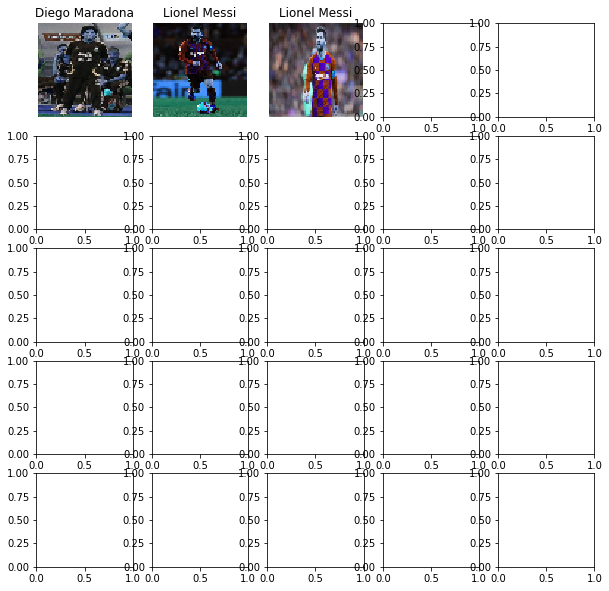

In [21]:
category={0:"Crishtiano Ronaldo",1:"Diego Maradona",2:"Lionel Messi",3:"Mbappe",4:"Ronaldinho"}

fig,axes = plt.subplots(5,5,figsize=(10,10))
for row in axes:
    for axe in row:
        indx = np.random.randint(499)
        axe.imshow(X[indx])
        axe.set_title(category[y[indx]])
        axe.set_axis_off()

Number of data sets:


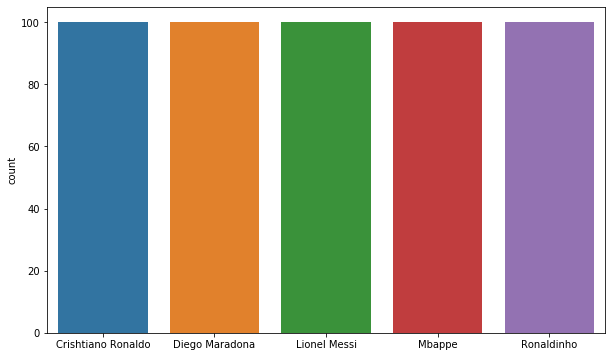

In [9]:
print('Number of data sets:')
label = []
for i in range(len(y)):
    label.append(category[y[i]])

plt.figure(figsize=(10,6))
sns.countplot(label)
plt.show()

#### Importing Libraries for CNN model

In [10]:
import keras
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from matplotlib import pyplot
from sklearn .metrics import classification_report,confusion_matrix
import h5py

# Making CNN Model

In [26]:
X= X/255.0

In [27]:
X[0].shape

(64, 64, 3)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42,stratify=y)

In [41]:
X_train.shape,y_train.shape

((450, 64, 64, 3), (450,))

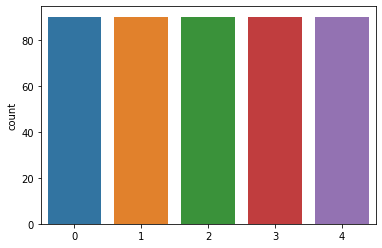

In [42]:
sns.countplot(y_train)
plt.show()

In [43]:
ytrain= keras.utils.to_categorical(y_train,num_classes=5)
ytest=keras.utils.to_categorical(y_test,num_classes=5)

In [47]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(X[0].shape)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# ANN-LAYERS
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Classification layer
model.add(Dense(5, activation='softmax'))

adam = Adam(learning_rate=0.0006,beta_1=0.9,beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1968256   
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
Total params: 1,971,669
Trainable params: 1,971,669
Non-trainable params: 0
____________________________________________

In [49]:
hist = model.fit(X_train, ytrain,validation_data=(X_train,ytrain),batch_size=32,epochs=100,verbose=2)

Train on 450 samples, validate on 450 samples
Epoch 1/100
 - 1s - loss: 1.6100 - accuracy: 0.1889 - val_loss: 1.6091 - val_accuracy: 0.2000
Epoch 2/100
 - 1s - loss: 1.6090 - accuracy: 0.2578 - val_loss: 1.6089 - val_accuracy: 0.2000
Epoch 3/100
 - 1s - loss: 1.6084 - accuracy: 0.2400 - val_loss: 1.6083 - val_accuracy: 0.2022
Epoch 4/100
 - 0s - loss: 1.6087 - accuracy: 0.2111 - val_loss: 1.6082 - val_accuracy: 0.2422
Epoch 5/100
 - 1s - loss: 1.6083 - accuracy: 0.2044 - val_loss: 1.6074 - val_accuracy: 0.2000
Epoch 6/100
 - 1s - loss: 1.6077 - accuracy: 0.2022 - val_loss: 1.6066 - val_accuracy: 0.2733
Epoch 7/100
 - 0s - loss: 1.6076 - accuracy: 0.2444 - val_loss: 1.6048 - val_accuracy: 0.2733
Epoch 8/100
 - 1s - loss: 1.6047 - accuracy: 0.2689 - val_loss: 1.6009 - val_accuracy: 0.3133
Epoch 9/100
 - 1s - loss: 1.6004 - accuracy: 0.2911 - val_loss: 1.5968 - val_accuracy: 0.2778
Epoch 10/100
 - 1s - loss: 1.6008 - accuracy: 0.2400 - val_loss: 1.5910 - val_accuracy: 0.2689
Epoch 11/100


Epoch 87/100
 - 1s - loss: 0.1412 - accuracy: 0.9733 - val_loss: 0.1038 - val_accuracy: 0.9933
Epoch 88/100
 - 1s - loss: 0.1088 - accuracy: 0.9911 - val_loss: 0.1032 - val_accuracy: 0.9933
Epoch 89/100
 - 1s - loss: 0.0951 - accuracy: 0.9956 - val_loss: 0.0788 - val_accuracy: 0.9978
Epoch 90/100
 - 1s - loss: 0.0789 - accuracy: 0.9956 - val_loss: 0.0782 - val_accuracy: 0.9956
Epoch 91/100
 - 1s - loss: 0.0930 - accuracy: 0.9933 - val_loss: 0.0815 - val_accuracy: 0.9956
Epoch 92/100
 - 0s - loss: 0.0755 - accuracy: 0.9956 - val_loss: 0.0698 - val_accuracy: 0.9978
Epoch 93/100
 - 1s - loss: 0.0997 - accuracy: 0.9844 - val_loss: 0.0972 - val_accuracy: 0.9822
Epoch 94/100
 - 1s - loss: 0.0793 - accuracy: 0.9889 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 95/100
 - 1s - loss: 0.0628 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 96/100
 - 1s - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 97/100
 - 1s - loss: 0.0664 - accuracy: 0.99

In [50]:
loss = hist.history["loss"]
accu = hist.history["accuracy"]

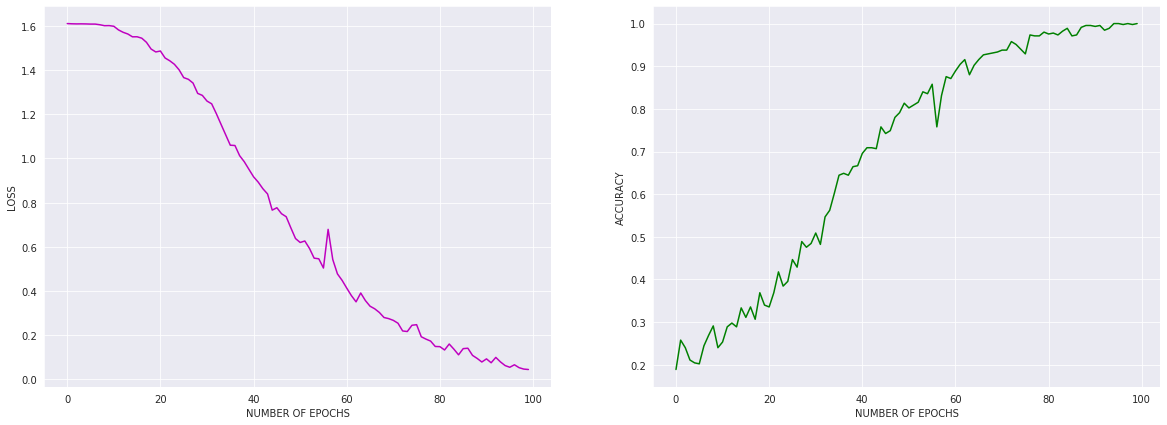

In [57]:
sns.set_style('darkgrid')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.plot(np.arange(100),loss,color='m')
ax1.set_xlabel('NUMBER OF EPOCHS')
ax1.set_ylabel('LOSS')
ax2.plot(np.arange(100),accu,color='g')
ax2.set_xlabel('NUMBER OF EPOCHS')
ax2.set_ylabel('ACCURACY')
plt.show()

In [84]:
predic =model.predict(X_test)

In [87]:
np.argmax(predic[0]),y_test[0]

(3, 3)

In [ ]:
pred=model.predict(X_train)

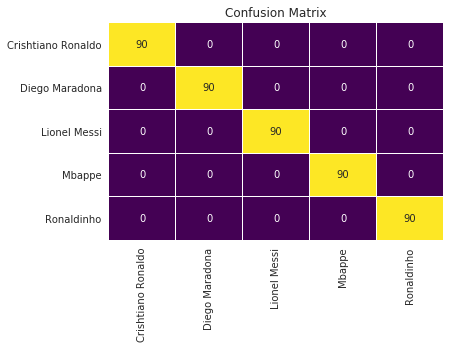

In [83]:
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
    
con = pd.DataFrame(confusion_matrix(y_train,prd),index=CATEGORY,columns=CATEGORY)

sns.heatmap(con,annot=True,cmap='viridis',cbar=False,linewidths=0.02)
plt.title('Confusion Matrix')
plt.show()

In [108]:
xtrain = X_train*255

Some Predicted Images


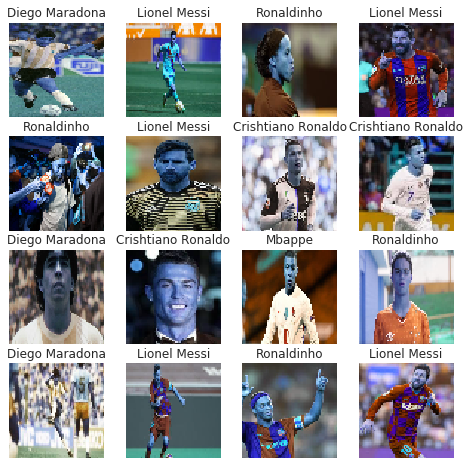

In [109]:
print('Some Predicted Images')
fig, axes = plt.subplots( 4,4,figsize = (8,8))
for row in axes:
    for j in row:
        index = np.random.randint(len(pred))
        j.imshow(xtrain[index])
        j.set_title(category[np.argmax(pred[index])])
        j.set_axis_off()
               

In [110]:
model.save('footballer_model.h5')
del model

In [15]:
model = load_model('footballer_model.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1968256   
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
Total params: 1,971,669
Trainable params: 1,971,669
Non-trainable params: 0
____________________________________________

In [24]:
category={0:"Crishtiano Ronaldo",1:"Diego Maradona",2:"Lionel Messi",3:"Mbappe",4:"Ronaldinho"}

In [27]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('images/Lionel Messi/12.jpg', target_size = (64, 64))

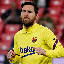

In [28]:
test_image

In [29]:
X = np.array(test_image).reshape(-1,64,64,3)
X.shape

(1, 64, 64, 3)

In [30]:
pred = model.predict(X)

In [32]:
pred

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [31]:
prediction = np.argmax(pred)
cls = category[prediction]
print(cls)

Diego Maradona
